In [1]:
from fastai import *
from fastai.vision import *
import  matplotlib.pyplot as plt
from PIL import Image
import os 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
image_path = Path('.')/'images'

In [4]:
image_path.ls()

[PosixPath('images/cloudy32.jpg'),
 PosixPath('images/shine209.jpg'),
 PosixPath('images/shine146.jpg'),
 PosixPath('images/sunrise282.jpg'),
 PosixPath('images/sunrise128.jpg'),
 PosixPath('images/rain97.jpg'),
 PosixPath('images/rain56.jpg'),
 PosixPath('images/shine62.jpg'),
 PosixPath('images/cloudy115.jpg'),
 PosixPath('images/rain196.jpg'),
 PosixPath('images/cloudy21.jpg'),
 PosixPath('images/cloudy25.jpg'),
 PosixPath('images/sunrise59.jpg'),
 PosixPath('images/shine171.jpg'),
 PosixPath('images/shine159.jpg'),
 PosixPath('images/rain66.jpg'),
 PosixPath('images/shine28.jpg'),
 PosixPath('images/sunrise313.jpg'),
 PosixPath('images/sunrise277.jpg'),
 PosixPath('images/rain158.jpg'),
 PosixPath('images/sunrise76.jpg'),
 PosixPath('images/rain145.jpg'),
 PosixPath('images/rain76.jpg'),
 PosixPath('images/sunrise347.jpg'),
 PosixPath('images/cloudy159.jpg'),
 PosixPath('images/rain87.jpg'),
 PosixPath('images/cloudy191.jpg'),
 PosixPath('images/rain60.jpg'),
 PosixPath('images/rai

In [5]:
fnames = get_image_files(image_path)
fnames[:5]

[PosixPath('images/cloudy32.jpg'),
 PosixPath('images/shine209.jpg'),
 PosixPath('images/shine146.jpg'),
 PosixPath('images/sunrise282.jpg'),
 PosixPath('images/sunrise128.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/0-9]+)\d+.(jpg|jpeg)$'

In [7]:
data = ImageDataBunch.from_name_re(image_path, fnames, pat, ds_tfms=get_transforms(), size=244, bs=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (900 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
shine,shine,sunrise,sunrise,rain
Path: images;

Valid: LabelList (225 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
cloudy,shine,sunrise,rain,shine
Path: images;

Test: None

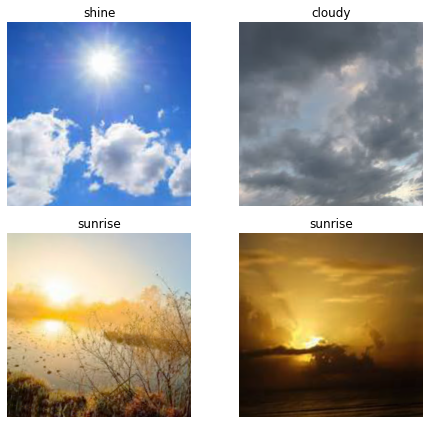

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
data.c,len(data.classes)

['cloudy', 'rain', 'shine', 'sunrise']


(4, 4)

In [21]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy_thresh, error_rate], callback_fns=[ShowGraph])

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.983073,0.376019,0.250000,0.111111,00:13
1,0.942092,0.209468,0.251111,0.053333,00:13
2,0.601504,0.146094,0.255556,0.031111,00:13
3,0.455112,0.111877,0.250000,0.035556,00:13


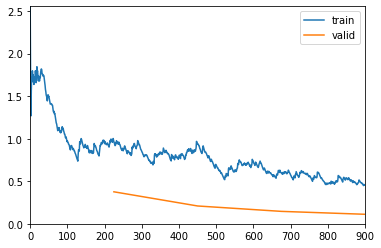

In [22]:
learn.fit_one_cycle(4)

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


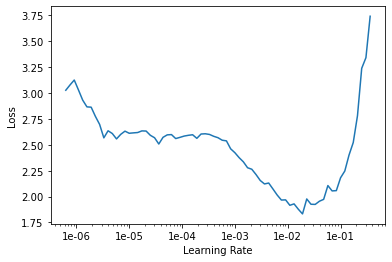

In [18]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,1.165363,0.473555,0.257778,0.128889,00:13
1,2.275924,0.648674,0.246667,0.168889,00:13
2,1.645855,0.539281,0.260000,0.186667,00:13
3,0.939395,0.175609,0.257778,0.044444,00:13
4,0.920054,0.279517,0.246667,0.088889,00:13


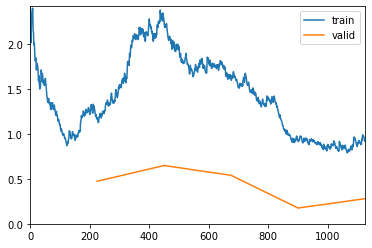

In [19]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.910536,0.213396,0.253333,0.062222,00:13
1,0.697342,0.152639,0.257778,0.053333,00:13
2,0.539901,0.165623,0.243333,0.053333,00:13
3,0.637402,0.165740,0.252222,0.062222,00:13
4,0.606443,0.155261,0.244444,0.057778,00:13


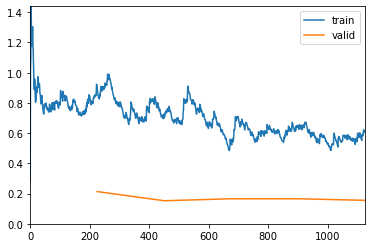

In [20]:
learn.fit_one_cycle(5, 1e-3)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy_thresh, error_rate], callback_fns=[ShowGraph])

epoch,train_loss,valid_loss,accuracy_thresh,error_rate,time
0,0.905150,0.371168,0.241111,0.128889,00:08
1,0.781449,0.335793,0.254444,0.128889,00:08
2,0.565868,0.263049,0.254444,0.111111,00:08
3,0.601757,0.208539,0.263333,0.080000,00:08


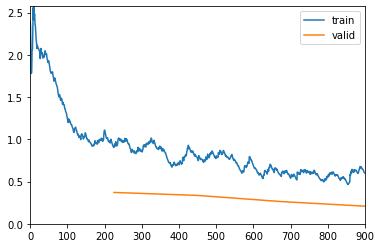

In [13]:
learn.fit_one_cycle(4)

In [33]:
learn.save('stage-1')

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

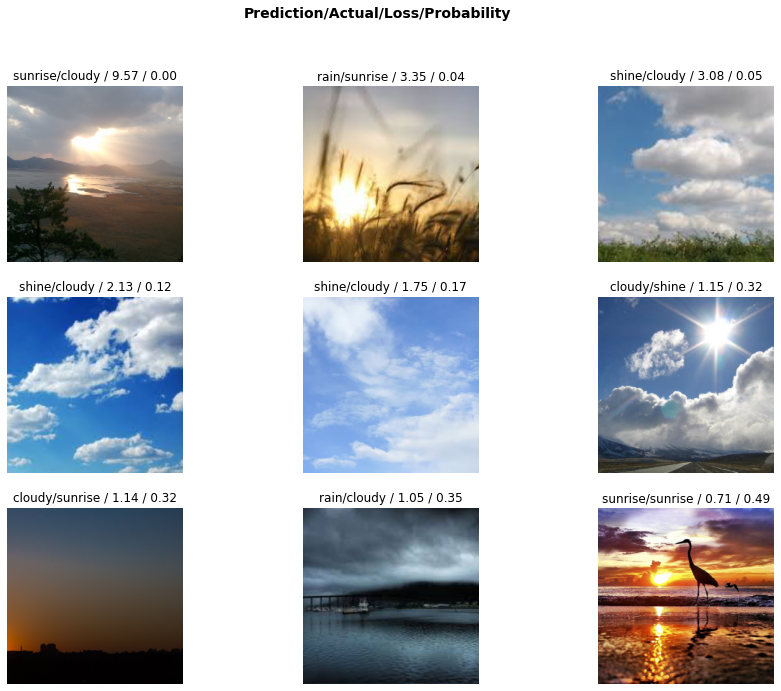

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

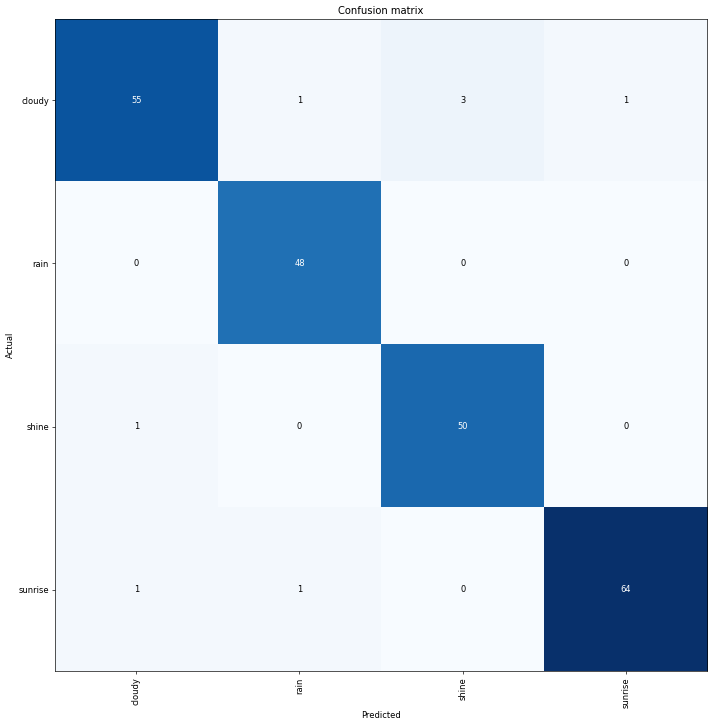

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [37]:
interp.most_confused(min_val=2)

[('cloudy', 'shine', 3)]

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


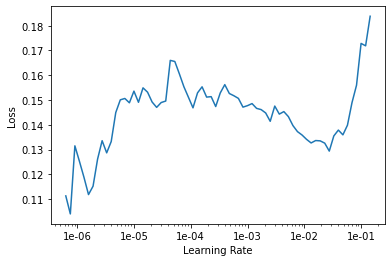

In [18]:
learn.recorder.plot()

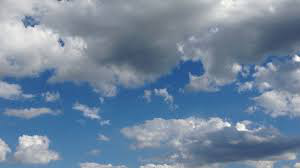

In [39]:
img = open_image("images/cloudy25.jpg")
img

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)

In [42]:
pred_class.obj

'cloudy'

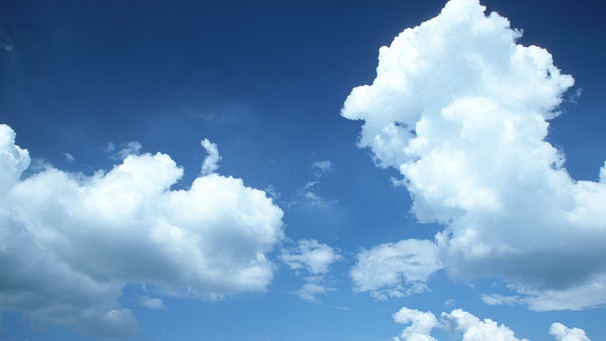

In [43]:
img = open_image("test/cloud.jpg")
img

In [44]:
pred_class,pred_idx,outputs = learn.predict(img)

In [45]:
pred_class.obj

'cloudy'

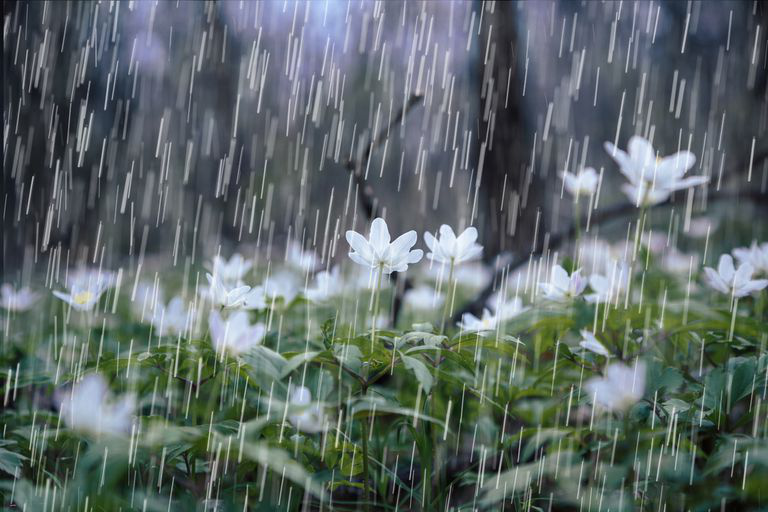

In [46]:
img = open_image("test/rain.jpg")
img

In [47]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'rain'